# Credit Card Approval : Exploratory Data-Analysis & Model Prediction
**Notebook's Author : Ayoub El-Hadine**

Being declined for a new credit card is frustrating and if you’re looking to be approved for a credit card, you’ll need to meet all of the card issuer’s minimum criteria for creditworthiness and income.So What Credit Score Do You Need To Get Approved For A Credit Card ? In order to approach an answer to this question an analysis for the Credit Card Approval dataset is required(Source:https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

## 1.Loading and cleaning the data

### 1.1.Loading the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

### 1.2.Loading the data

After loading our dataset we find first that there are 17 features and 25134 examples.

In [2]:
df=pd.read_excel(r'Data.xlsx')
print(df.shape)
df

(25134, 17)


,Unnamed: 0,ID,Gender,OWN_CAR,OWN_REALTY,CNT_CHILDREN,ANN_INC,INC_CAT,EDU_LVL,STATUS,LIVING,OCCUPATION_TYPE,FAM_CNT,Age,Experience,Approved,target
0,2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2,58,3,No,0
1,3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8,No,0
2,4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8,No,0
3,5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8,No,0
4,6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,Accountants,2,47,6,Yes,1
25130,36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,Accountants,2,33,3,Yes,1
25131,36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,Accountants,2,33,3,Yes,1
25132,36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,Accountants,2,49,1,Yes,1


### 1.3.Cleaning the data

We will drop columns **ID** and **Unnamed: 0** since they doesn't provide a significant information for our problem. We will also drop the **Approved** column because we already have **target** wich is an encoding for **Approved**(1 for approved and 0 for declined).

In [3]:
df = df.drop(columns=['ID','Unnamed: 0','Approved'])
print(df.shape)

(25134, 14)


We will find that there are 0 missing values in our dataset after exploring it.

In [4]:
df.isnull().sum()

Gender             0
OWN_CAR            0
OWN_REALTY         0
CNT_CHILDREN       0
ANN_INC            0
INC_CAT            0
EDU_LVL            0
STATUS             0
LIVING             0
OCCUPATION_TYPE    0
FAM_CNT            0
Age                0
Experience         0
target             0
dtype: int64

In our dataset we have three data types : **object**, **int** and **float**.

In [5]:
df.dtypes

Gender              object
OWN_CAR             object
OWN_REALTY          object
CNT_CHILDREN         int64
ANN_INC            float64
INC_CAT             object
EDU_LVL             object
STATUS              object
LIVING              object
OCCUPATION_TYPE     object
FAM_CNT              int64
Age                  int64
Experience           int64
target               int64
dtype: object

**Selecting number variables in our dataset**

In [6]:
df.select_dtypes(include=["number"])

,CNT_CHILDREN,ANN_INC,FAM_CNT,Age,Experience,target
0,0,112500.0,2,58,3,0
1,0,270000.0,1,52,8,0
2,0,270000.0,1,52,8,0
3,0,270000.0,1,52,8,0
4,0,270000.0,1,52,8,0
...,...,...,...,...,...,...
25129,0,315000.0,2,47,6,1
25130,0,157500.0,2,33,3,1
25131,0,157500.0,2,33,3,1
25132,0,283500.0,2,49,1,1


**Selecting object variables in our dataset**

In [7]:
df.select_dtypes(include=["object"])

,Gender,OWN_CAR,OWN_REALTY,INC_CAT,EDU_LVL,STATUS,LIVING,OCCUPATION_TYPE
0,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,Security staff
1,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff
2,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff
3,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff
4,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff
...,...,...,...,...,...,...,...,...
25129,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,Accountants
25130,F,N,Y,Commercial associate,Higher education,Married,House / apartment,Accountants
25131,F,N,Y,Pensioner,Higher education,Married,House / apartment,Accountants
25132,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Accountants


**Dealing with duplicated values**

After searching in our dataset for duplicated values we find that there are **18249** values that are duplicated.

In [8]:
df[df.columns].duplicated().sum()

18249

**Dropping duplicated values**

In [9]:
df.drop_duplicates(subset=["CNT_CHILDREN","ANN_INC","FAM_CNT","Age","Experience","target","Gender","OWN_CAR","OWN_REALTY","INC_CAT","EDU_LVL","STATUS","LIVING","OCCUPATION_TYPE"],keep='first',inplace=True)
print(df.shape)

(6885, 14)


**Writing our data into NewData.csv**

In [10]:
df.to_csv('NewData.csv',index=False)

## 2.Exploratory Data-Analysis

### 2.1.Loading and exploring cleaned data

In [11]:
#EDA
df=pd.read_csv(r'NewData.csv')
df

,Gender,OWN_CAR,OWN_REALTY,CNT_CHILDREN,ANN_INC,INC_CAT,EDU_LVL,STATUS,LIVING,OCCUPATION_TYPE,FAM_CNT,Age,Experience,target
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2,58,3,0
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8,0
2,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,Accountants,2,46,2,0
3,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,Accountants,2,48,3,0
4,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,Accountants,2,29,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,Accountants,2,47,6,1
6881,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,Accountants,2,33,3,1
6882,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,Accountants,2,33,3,1
6883,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,Accountants,2,49,1,1


In [12]:
df.describe()

,CNT_CHILDREN,ANN_INC,FAM_CNT,Age,Experience,target
count,6885.000000,6.885000e+03,6885.000000,6885.000000,6885.000000,6885.000000
mean,0.508642,1.902379e+05,2.282353,39.953377,6.297894,0.043282
std,0.819640,1.027644e+05,0.977901,9.673670,6.293518,0.203507
min,0.000000,2.700000e+04,1.000000,20.000000,0.000000,0.000000
25%,0.000000,1.260000e+05,2.000000,32.000000,2.000000,0.000000
50%,0.000000,1.710000e+05,2.000000,39.000000,4.000000,0.000000
75%,1.000000,2.250000e+05,3.000000,47.000000,9.000000,0.000000
max,19.000000,1.575000e+06,20.000000,67.000000,43.000000,1.000000


### 2.2.Asking Data questions

**How many clients have been approved and how many clients have been declined?**

We'll group our dataset by target into two groups, one for **target=1** (Approved) and one for **target=0** (declined).

In [13]:
#number of approved clients vs declined clients
ap=df.groupby('target').get_group(1)
dec=df.groupby('target').get_group(0)
num_ap=ap.shape[0]
num_dec=dec.shape[0]
print(num_ap,"Clients have been approved\n",num_dec,"Clients have been declined")

298 Clients have been approved
 6587 Clients have been declined


**Wich client has the highest annual income?**

In [14]:
#Wich client has the highest annual income?
df[df.ANN_INC==df.ANN_INC.max()]

,Gender,OWN_CAR,OWN_REALTY,CNT_CHILDREN,ANN_INC,INC_CAT,EDU_LVL,STATUS,LIVING,OCCUPATION_TYPE,FAM_CNT,Age,Experience,target
6366,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,Accountants,2,27,6,0


**Wich client has the lowest annual income?**

In [15]:
#Wich client has the lowest annual income?
df[df.ANN_INC==df.ANN_INC.min()]

,Gender,OWN_CAR,OWN_REALTY,CNT_CHILDREN,ANN_INC,INC_CAT,EDU_LVL,STATUS,LIVING,OCCUPATION_TYPE,FAM_CNT,Age,Experience,target
5840,F,N,N,0,27000.0,Working,Higher education,Civil marriage,House / apartment,Accountants,2,40,13,0
6376,F,N,Y,0,27000.0,Working,Secondary / secondary special,Married,House / apartment,Accountants,2,52,3,0


**Wich approved client with the highest annual income?**

In [16]:
#Wich approved client with the highest annual income
ap=df.groupby('target').get_group(1)
ap[ap.ANN_INC==ap.ANN_INC.max()]

,Gender,OWN_CAR,OWN_REALTY,CNT_CHILDREN,ANN_INC,INC_CAT,EDU_LVL,STATUS,LIVING,OCCUPATION_TYPE,FAM_CNT,Age,Experience,target
3371,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,Accountants,4,27,2,1


**Wich approved client with the lowest annual income?**

In [17]:
#Wich approved client with the lowest annuel income
ap=df.groupby('target').get_group(1)
ap[ap.ANN_INC==ap.ANN_INC.min()]

,Gender,OWN_CAR,OWN_REALTY,CNT_CHILDREN,ANN_INC,INC_CAT,EDU_LVL,STATUS,LIVING,OCCUPATION_TYPE,FAM_CNT,Age,Experience,target
3809,F,N,N,0,36000.0,Working,Secondary / secondary special,Married,With parents,Accountants,2,39,1,1


**% of approved clients with a car and % of clients without car**

In [18]:
#How many approved clients are owning a car and how many are not?
l=0
for i in ap.OWN_CAR:
    if i=='Y':
        l+=1
print(round((l/num_ap)*100),'% of Approved clients are owning a car\n',round(((num_ap-l)/num_ap)*100),'% of Approved clients are not owning a car')

l=0
for i in dec.OWN_CAR:
    if i=='Y':
        l+=1
print(round((l/num_dec)*100),'% of Declined clients are owning a car\n',round(((num_dec-l)/num_dec)*100),'% of Declined clients are not owning a car')      

40 % of Approved clients are owning a car
 60 % of Approved clients are not owning a car
41 % of Declined clients are owning a car
 59 % of Declined clients are not owning a car


**% of approved clients with a house and % of clients without a house**

In [19]:
#How many approved clients are owning a house and how many are not?
l=0
for i in ap.OWN_REALTY:
    if i=='Y':
        l+=1
print(round((l/num_ap)*100),'% of Approved clients are owning a house\n',round(((num_ap-l)/num_ap)*100),'% of Approved clients are not owning a house')

l=0
for i in dec.OWN_REALTY:
    if i=='Y':
        l+=1
print(round((l/num_dec)*100),'% of Declined clients are owning a house\n',round(((num_dec-l)/num_dec)*100),'% of Declined clients are not owning a house')      

57 % of Approved clients are owning a house
 43 % of Approved clients are not owning a house
66 % of Declined clients are owning a house
 34 % of Declined clients are not owning a house


### 2.3.Data Viz

**Categorical barplots**

After visualization of our categorical features with barplots, such as for income category we find that all clients who are pensioners have been approved and all Students have been declined. For Occupation type we find that all Accountants have been approved as well and all Security Staff and Sales Staff have been declined.For Status most of Single/not married and widow clients have been approved. For Education level none of approved clients have an academic degree.

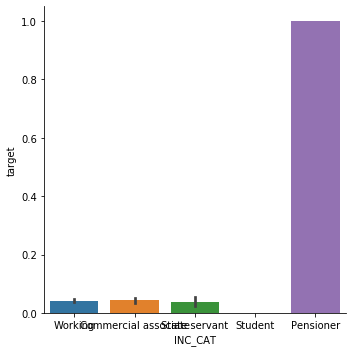

In [20]:
sns.catplot(x="INC_CAT", y="target", kind="bar", data=df)

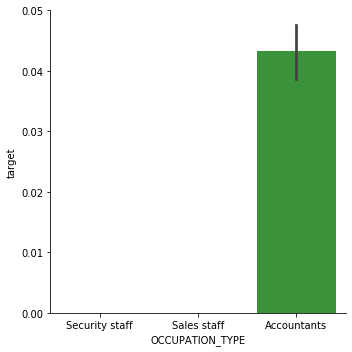

In [21]:
sns.catplot(x="OCCUPATION_TYPE", y="target", kind="bar", data=df)

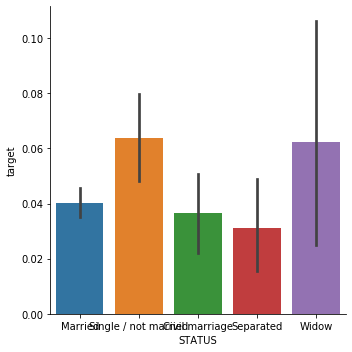

In [22]:
sns.catplot(x="STATUS", y="target", kind="bar", data=df)

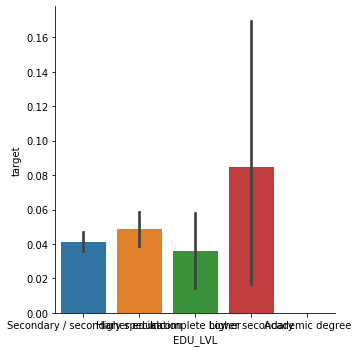

In [23]:
sns.catplot(x="EDU_LVL", y="target", kind="bar", data=df)

**Distribution Plots**

For distributions we find that Annual Income, Count Children, Family Count and Experience are **positives Skeweds**. For Age feature is a **Normal** distribution.

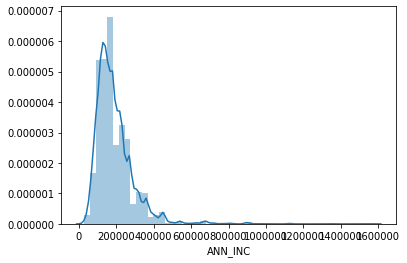

In [24]:
sns.distplot(df.ANN_INC)

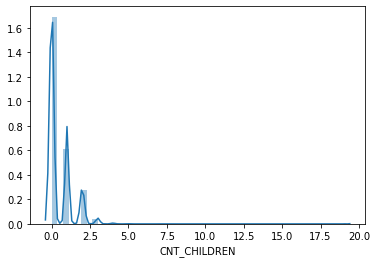

In [25]:
sns.distplot(df.CNT_CHILDREN)

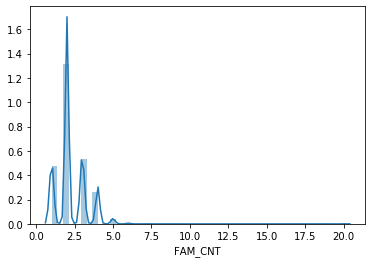

In [26]:
sns.distplot(df.FAM_CNT)

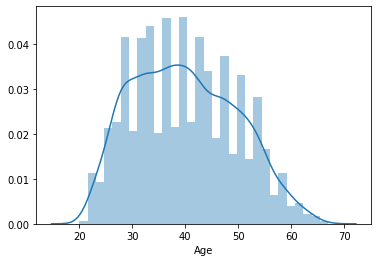

In [27]:
sns.distplot(df.Age)

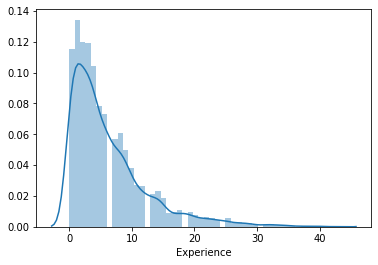

In [28]:
sns.distplot(df.Experience)

**Box Plots**

We find that there are outliers in our dataset features except Age wich is expected since we have all our features are positives skeweds except Age wich is a normal distribution.

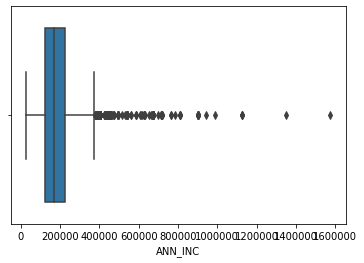

In [29]:
sns.boxplot(df.ANN_INC)

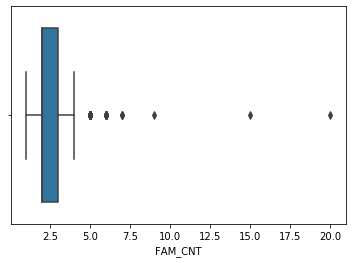

In [30]:
sns.boxplot(df.FAM_CNT)

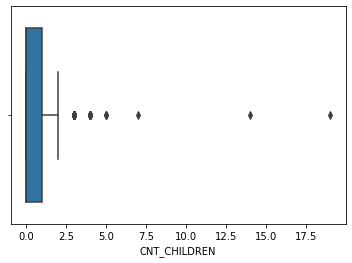

In [31]:
sns.boxplot(df.CNT_CHILDREN)

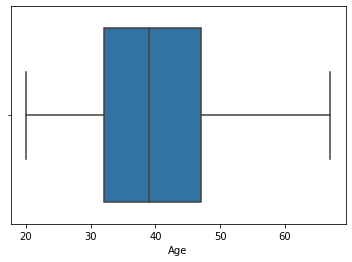

In [32]:
sns.boxplot(df.Age)

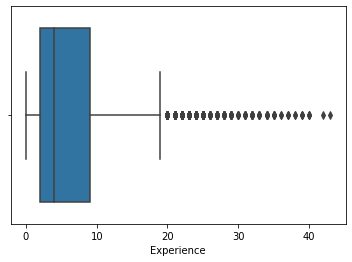

In [33]:
sns.boxplot(df.Experience)

**Correlation Matrix**

In [34]:
corr=df.corr()
corr

,CNT_CHILDREN,ANN_INC,FAM_CNT,Age,Experience,target
CNT_CHILDREN,1.000000,-0.007927,0.904397,-0.236425,-0.057482,0.009949
ANN_INC,-0.007927,1.000000,-0.012036,0.071059,0.026825,0.017780
FAM_CNT,0.904397,-0.012036,1.000000,-0.180083,-0.033779,-0.001563
Age,-0.236425,0.071059,-0.180083,1.000000,0.335094,-0.003402
Experience,-0.057482,0.026825,-0.033779,0.335094,1.000000,-0.035134
target,0.009949,0.017780,-0.001563,-0.003402,-0.035134,1.000000


**HeatMap plot For correlation**

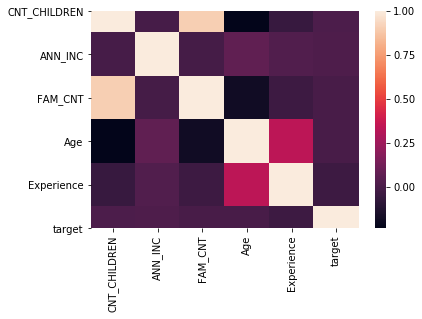

In [35]:
sns.heatmap(corr)

## 3.Model Prediction And Preprocessing

### 3.1.Preprocessing

**Label Incoding**

We'll LabelEncode our Categorical features.

In [36]:
#Preprocessing and model prediction
le = preprocessing.LabelEncoder()
le.fit(df.OWN_REALTY)
df['OWN_REALTY_encoded']=le.transform(df.OWN_REALTY)
le.fit(df.Gender)
df['Gender_encoded']=le.transform(df.Gender)
le.fit(df.OWN_CAR)
df['OWN_CAR_encoded']=le.transform(df.OWN_CAR)
le.fit(df.INC_CAT)
df['INC_CAT_encoded']=le.transform(df.INC_CAT)
le.fit(df.STATUS)
df['STATUS_encoded']=le.transform(df.STATUS)
le.fit(df.OCCUPATION_TYPE)
df['OCCUPATION_TYPE_encoded']=le.transform(df.OCCUPATION_TYPE)
le.fit(df.LIVING)
df['LIVING_encoded']=le.transform(df.LIVING)
le.fit(df.EDU_LVL)
df['EDU_LVL_encoded']=le.transform(df.EDU_LVL)

**Dropping NonEncoded Categorical Features**

In [37]:
df = df.drop(columns=['Gender','OWN_CAR','OWN_REALTY','INC_CAT','EDU_LVL','STATUS','LIVING','OCCUPATION_TYPE'])
df

,CNT_CHILDREN,ANN_INC,FAM_CNT,Age,Experience,target,OWN_REALTY_encoded,Gender_encoded,OWN_CAR_encoded,INC_CAT_encoded,STATUS_encoded,OCCUPATION_TYPE_encoded,LIVING_encoded,EDU_LVL_encoded
0,0,112500.0,2,58,3,0,1,1,1,4,1,2,1,4
1,0,270000.0,1,52,8,0,1,0,0,0,3,1,1,4
2,0,270000.0,2,46,2,0,1,1,1,4,1,0,1,1
3,0,135000.0,2,48,3,0,1,1,1,0,1,0,1,4
4,0,130500.0,2,29,3,0,0,0,1,4,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,0,315000.0,2,47,6,1,1,1,1,4,1,0,1,4
6881,0,157500.0,2,33,3,1,1,0,0,0,1,0,1,1
6882,0,157500.0,2,33,3,1,1,0,0,1,1,0,1,1
6883,0,283500.0,2,49,1,1,1,0,0,4,1,0,1,4


In [38]:
df = df[[ col for col in df.columns if col != 'target' ] + ['target']]
df

,CNT_CHILDREN,ANN_INC,FAM_CNT,Age,Experience,OWN_REALTY_encoded,Gender_encoded,OWN_CAR_encoded,INC_CAT_encoded,STATUS_encoded,OCCUPATION_TYPE_encoded,LIVING_encoded,EDU_LVL_encoded,target
0,0,112500.0,2,58,3,1,1,1,4,1,2,1,4,0
1,0,270000.0,1,52,8,1,0,0,0,3,1,1,4,0
2,0,270000.0,2,46,2,1,1,1,4,1,0,1,1,0
3,0,135000.0,2,48,3,1,1,1,0,1,0,1,4,0
4,0,130500.0,2,29,3,0,0,1,4,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,0,315000.0,2,47,6,1,1,1,4,1,0,1,4,1
6881,0,157500.0,2,33,3,1,0,0,0,1,0,1,1,1
6882,0,157500.0,2,33,3,1,0,0,1,1,0,1,1,1
6883,0,283500.0,2,49,1,1,0,0,4,1,0,1,4,1


In [39]:
X=df[df.columns[0:13]]
X

,CNT_CHILDREN,ANN_INC,FAM_CNT,Age,Experience,OWN_REALTY_encoded,Gender_encoded,OWN_CAR_encoded,INC_CAT_encoded,STATUS_encoded,OCCUPATION_TYPE_encoded,LIVING_encoded,EDU_LVL_encoded
0,0,112500.0,2,58,3,1,1,1,4,1,2,1,4
1,0,270000.0,1,52,8,1,0,0,0,3,1,1,4
2,0,270000.0,2,46,2,1,1,1,4,1,0,1,1
3,0,135000.0,2,48,3,1,1,1,0,1,0,1,4
4,0,130500.0,2,29,3,0,0,1,4,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,0,315000.0,2,47,6,1,1,1,4,1,0,1,4
6881,0,157500.0,2,33,3,1,0,0,0,1,0,1,1
6882,0,157500.0,2,33,3,1,0,0,1,1,0,1,1
6883,0,283500.0,2,49,1,1,0,0,4,1,0,1,4


In [40]:
y=df['target']
y

0       0
1       0
2       0
3       0
4       0
       ..
6880    1
6881    1
6882    1
6883    1
6884    1
Name: target, Length: 6885, dtype: int64

### 3.2.Model Predictions

After using four classifiers models, we find that RandomForest and XtreemGradientBoosting have roughly the same accuracy of 94%, SupportVectorMachines Model have a 95.5% Accuracy and 90% for the decisionTree Model.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,stratify = y)
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)
model2 = XGBClassifier()
model2.fit(X_train, y_train)
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
model4 = SVC()
model4.fit(X_train, y_train)
yhat1 = model1.predict(X_test)
yhat2 = model2.predict(X_test)
yhat3 = model3.predict(X_test)
yhat4 = model4.predict(X_test)
acc1 = accuracy_score(y_test, yhat1)
acc2 = accuracy_score(y_test, yhat2)
acc3 = accuracy_score(y_test, yhat3)
acc4 = accuracy_score(y_test, yhat4)
print('Randomforest model reached accuracy of: %.3f\n' % acc1)
print('XtreemGradientBoosting model reached accuracy of: %.3f\n' % acc2)
print('DecisionTree model reached accuracy of: %.3f\n' % acc3)
print('SupportVectorMachines model reached accuracy of: %.3f\n' % acc4)

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Randomforest model reached accuracy of: 0.941

XtreemGradientBoosting model reached accuracy of: 0.946

DecisionTree model reached accuracy of: 0.903

SupportVectorMachines model reached accuracy of: 0.955

